## Modelo 01

Como parte del bootcamp de Henry de Data Science se realiza un modelo para predecir el número de bicicletas.

### Exploración de datos

El objetivo de la primera parte del notebook es realizar una exploración de los datos del Dataset bike_train.xlsx

1. Cargamos las librerías y los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
bike_train = pd.read_excel('bike_train.xlsx', index_col = 0)
bike_test = pd.read_excel('bike_test.xlsx', index_col = 0)
bike_train.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
drop_columns = ['dteday', 'casual', 'registered']
train = bike_train.drop(drop_columns, axis =1)
test = bike_test.drop(['dteday'], axis =1)
train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
corrmat = train.corr()
corrmat

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.111369
yr,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.156960
mnth,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.073431
hr,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.396698
holiday,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,-0.030304
weekday,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.022618
workingday,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,0.025132
weathersit,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.149848
temp,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.395743
atemp,0.413196,-0.190360,0.358541,0.134633,-0.038005,-0.009841,0.066305,-0.081386,0.991785,1.000000,-0.003669,-0.057619,0.395234


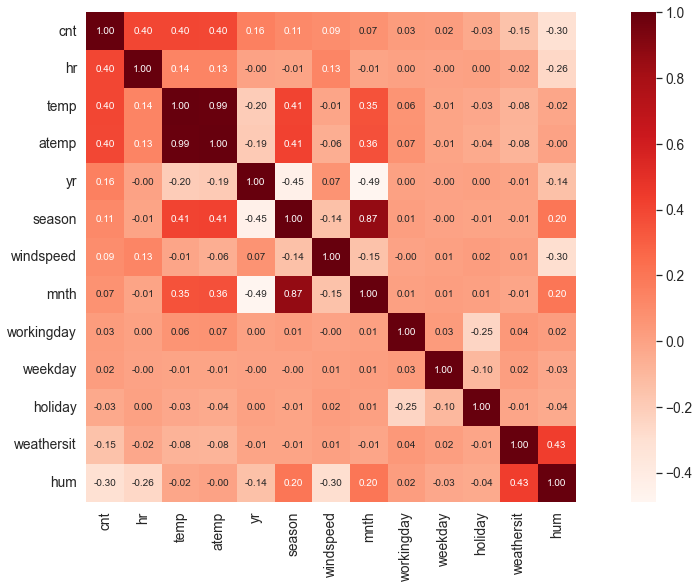

In [5]:
plt.figure(figsize=(20, 9))
k=13
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Reds")
plt.show()

In [6]:
train_target = train['cnt']

train_feature = train.drop(['cnt'], axis=1)
train_target.shape, train_feature.shape

((11999,), (11999, 12))

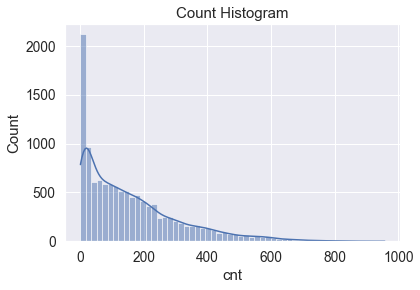

In [7]:
plt.title('Count Histogram')
sns.histplot(train_target, kde=True)
plt.show()

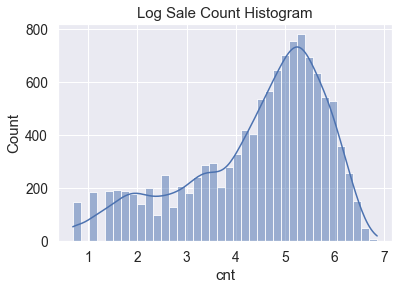

In [8]:
plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(train_target)

sns.histplot(train_target_log, kde=True)
plt.show()

In [9]:
train_target_log.describe()

count    11999.000000
mean         4.408974
std          1.402305
min          0.693147
25%          3.555348
50%          4.779123
75%          5.451038
max          6.864848
Name: cnt, dtype: float64

In [10]:
# One Hot Encoding 
train_featute_ohe = pd.get_dummies(train_feature, columns=['season', 'weathersit', 'yr', 'mnth', 'hr'])
test_featute_ohe = pd.get_dummies(test, columns=['season', 'weathersit', 'yr', 'mnth', 'hr'])
train_featute_ohe
# 10886 rows × 71 columns
train_featute_ohe.columns 

Index(['holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [11]:
test_featute_ohe.columns

Index(['holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'yr_1', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [12]:
test_featute_ohe.insert(14, 'weathersit_4',0)


In [13]:
test_featute_ohe.insert(16, 'mnth_1', 0)
test_featute_ohe.insert(17, 'mnth_2', 0)
test_featute_ohe.insert(18, 'mnth_3', 0)
test_featute_ohe.insert(19, 'mnth_4', 0)


In [14]:
test_featute_ohe.insert(15, 'yr_0', 0)

In [15]:
test_featute_ohe.columns

Index(['holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [16]:
train_featute_ohe = pd.get_dummies(train_feature, columns=['season', 'weathersit', 'yr', 'mnth', 'hr'])
train_featute_ohe

,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
instant,,,,,,,,,,,,,,,,,,,,,
1,0,6,0,0.24,0.2879,0.81,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,6,0,0.22,0.2727,0.80,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6,0,0.22,0.2727,0.80,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,6,0,0.60,0.6212,0.56,0.1642,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11996,0,0,0,0.58,0.5455,0.53,0.1045,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11997,0,0,0,0.56,0.5303,0.52,0.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_featute_ohe.columns.shape

(53,)

In [18]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_featute_ohe, train_target_log, test_size=0.2, random_state=42)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((9599, 53), (2400, 53), (9599,), (2400,))

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [20]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [22]:
tf.random.set_seed(42)

model = Sequential([
    Dense(200, activation='tanh', use_bias=True),
    Dense(200, activation='tanh', use_bias=True),
    Dense(1)
])


model.compile(
    loss=rmse,
    optimizer='adam',
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
300/300 [==============================] - 1s 2ms/step - loss: 0.7935 - rmse: 0.7935
Epoch 2/200
300/300 [==============================] - 0s 2ms/step - loss: 0.5881 - rmse: 0.5881
Epoch 3/200
300/300 [==============================] - 0s 1ms/step - loss: 0.4189 - rmse: 0.4189
Epoch 4/200
300/300 [==============================] - 0s 2ms/step - loss: 0.3700 - rmse: 0.3700
Epoch 5/200
300/300 [==============================] - 0s 2ms/step - loss: 0.3579 - rmse: 0.3579
Epoch 6/200
300/300 [==============================] - 0s 1ms/step - loss: 0.3507 - rmse: 0.3507
Epoch 7/200
300/300 [==============================] - 0s 1ms/step - loss: 0.3445 - rmse: 0.3445
Epoch 8/200
300/300 [==============================] - 0s 1ms/step - loss: 0.3446 - rmse: 0.3446
Epoch 9/200
300/300 [==============================] - 0s 1ms/step - loss: 0.3336 - rmse: 0.3336
Epoch 10/200
300/300 [==============================] - 0s 2ms/step - loss: 0.3303 - rmse: 0.3303
Epoch 11/200
300/300 [=======

In [23]:
predictions = model.predict(X_validation)

75/75 [==============================] - 0s 2ms/step


In [24]:
predictions = np.ravel(predictions)

In [25]:
rmse(y_validation, predictions).numpy()

0.3521220812927823

In [26]:
pred = model.predict(test_featute_ohe)


169/169 [==============================] - 0s 1ms/step


In [28]:
pred[0:10]

array([[2.9999416],
       [2.5312817],
       [3.00228  ],
       [3.638214 ],
       [5.007566 ],
       [5.34337  ],
       [5.9022098],
       [6.0758977],
       [6.369362 ],
       [6.4076657]], dtype=float32)

In [29]:
predicted_count = np.expm1(pred)
predicted_count[0:10]

array([[ 19.084364],
       [ 11.569607],
       [ 19.131384],
       [ 37.02387 ],
       [148.54031 ],
       [208.21657 ],
       [364.845   ],
       [434.24005 ],
       [582.68524 ],
       [605.4763  ]], dtype=float32)

In [30]:
predicted_count = np.round(predicted_count, 0)
predicted_count[0:10]

array([[ 19.],
       [ 12.],
       [ 19.],
       [ 37.],
       [149.],
       [208.],
       [365.],
       [434.],
       [583.],
       [605.]], dtype=float32)

In [95]:
pred = pd.DataFrame(predicted_count, columns = ['pred'])

In [98]:
pred.to_csv('TeffaHM.csv', header=True, index=False)